In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [18]:
raw_data = pd.read_csv('data.csv')
raw_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [19]:
labels = raw_data['DEATH_EVENT']
data = raw_data.drop(columns=['DEATH_EVENT'])
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [20]:
scaler = StandardScaler()
data = scaler.fit_transform(data)
data

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01, -6.87681906e-01, -1.62950241e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
         7.35688190e-01, -6.87681906e-01, -1.60369074e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         7.35688190e-01,  1.45416070e+00, -1.59078490e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -1.35927151e+00, -6.87681906e-01,  1.90669738e+00],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         7.35688190e-01,  1.45416070e+00,  1.93250906e+00],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         7.35688190e-01,  1.45416070e+00,  1.99703825e+00]])

In [21]:
data_centred = data - data.mean()
cov_matrix = np.cov(data_centred, rowvar=False)
eig_values, eig_vectors = np.linalg.eig(cov_matrix)
idx = np.argsort(eig_values)[::-1]
eig_vectors = eig_vectors[:,idx]

data_2d = data_centred.dot(eig_vectors[:,:2])
data_3d = data_centred.dot(eig_vectors[:,:3])

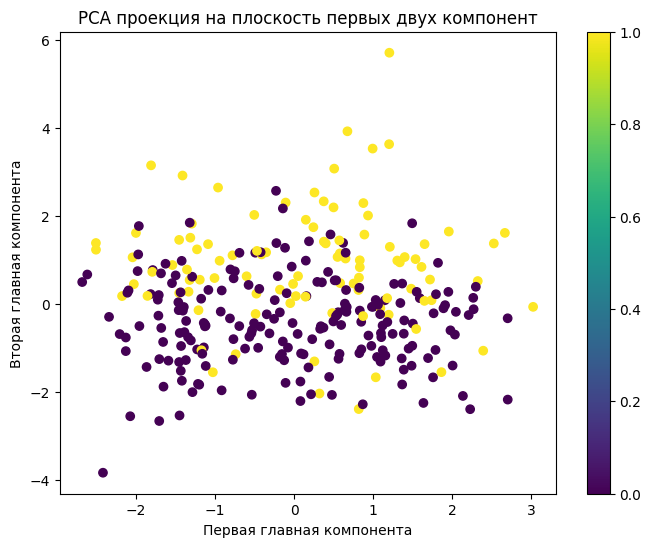

In [22]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('PCA проекция на плоскость первых двух компонент')
plt.show()

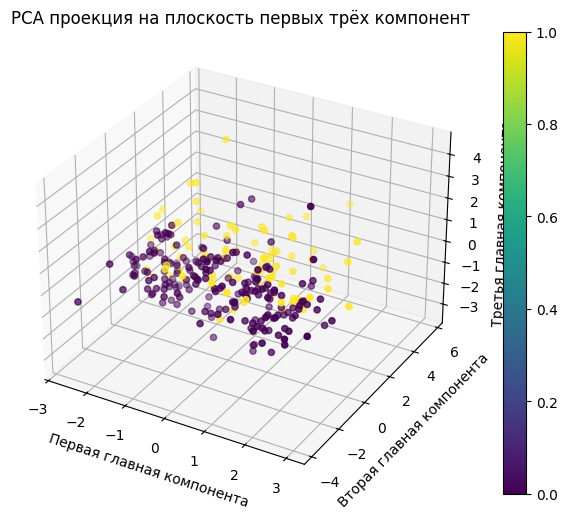

In [23]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=labels, cmap='viridis')
fig.colorbar(scatter)
ax.set_xlabel('Первая главная компонента')
ax.set_ylabel('Вторая главная компонента')
ax.set_zlabel('Третья главная компонента')
ax.set_title('PCA проекция на плоскость первых трёх компонент')
plt.show()

In [24]:
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2)
data_2d = pca_2d.fit_transform(data)

pca_3d = PCA(n_components=3)
data_3d = pca_3d.fit_transform(data)

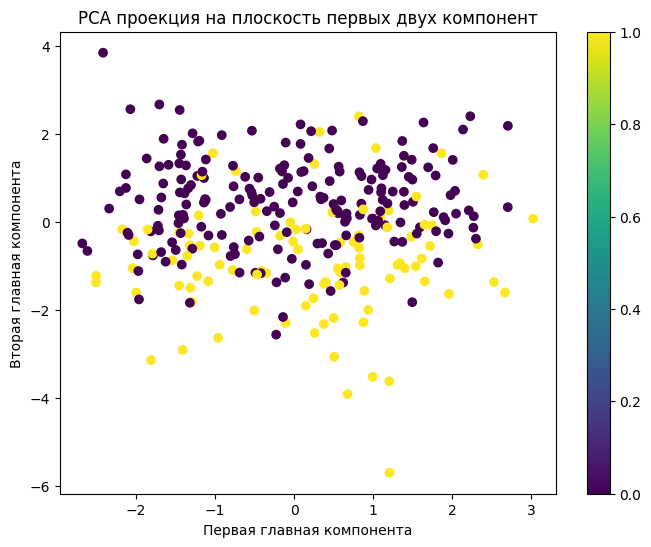

In [25]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('PCA проекция на плоскость первых двух компонент')
plt.show()

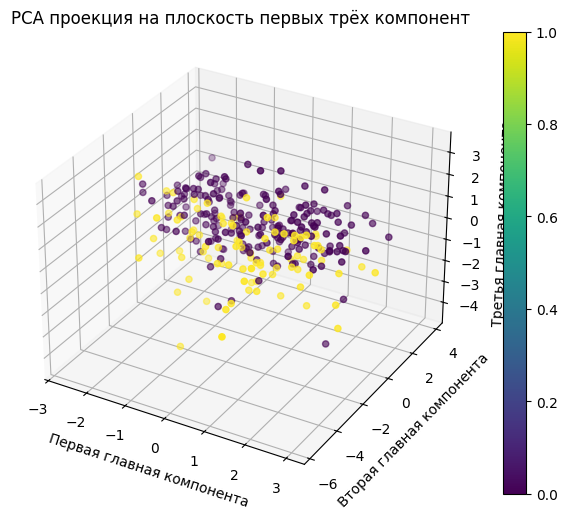

In [26]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=labels, cmap='viridis')
fig.colorbar(scatter)
ax.set_xlabel('Первая главная компонента')
ax.set_ylabel('Вторая главная компонента')
ax.set_zlabel('Третья главная компонента')
ax.set_title('PCA проекция на плоскость первых трёх компонент')
plt.show()

In [27]:
total_var = np.sum(eig_values)

explained_var_ratio = np.cumsum(sorted(eig_values, reverse=True)) / total_var

loss_2d = 1 - explained_var_ratio[1]
loss_3d = 1 - explained_var_ratio[2]

print("Потери при 2D проекции:", loss_2d)
print("Потери при 3D проекции:", loss_3d)

Потери при 2D проекции: 0.7298282212466729
Потери при 3D проекции: 0.624149675758013
